In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as Fn
from torch.utils.data import TensorDataset
from sklearn.model_selection import train_test_split
from scipy.io import savemat
from time import time
from sklearn.metrics import roc_auc_score

device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [2]:
X=np.loadtxt ("data/YearPredictionMSD.txt",delimiter=',')
Y=torch.tensor(X[:,0]).float()
X=torch.tensor(X[:,1:]).float()
print(X.shape,Y.shape)
nhidden=64

torch.Size([515345, 90]) torch.Size([515345])


In [3]:
X=np.loadtxt ("data/abalone.csv",delimiter=',')
Y=torch.tensor(X[:,7]).float()
X=torch.tensor(X[:,0:7]).float()
print(X.shape,Y.shape)
nhidden=64

torch.Size([4177, 7]) torch.Size([4177])


In [4]:
X=np.loadtxt ("data/bike-sharing_hour.csv",delimiter=',')
Y=X[:,-1]
X=X[:,0:-2]
print(X.shape,Y.shape)
X=torch.tensor(X).float()
Y=torch.tensor(Y).float()
nhidden=64

(17379, 13) (17379,)


In [5]:
import imageio
im = imageio.imread('d:/datasets/bsds300/images/test-gray/102061.jpg')
print(im.shape)
ny,nx=im.shape
px=15
patches=[]
for i in range(0,ny-px,3):
    for j in range(0,nx-px,3):
        p=im[i:i+px,j:j+px]
        patches.append(p)
patches=torch.tensor(patches)
patches.shape
X=patches.reshape(-1,px**2).float()
Y=X[:,:].clone()
nhidden=32
print(X.shape,Y.shape)
#np.savetxt('X.txt',X,fmt='%1.0f',delimiter=',')

C:\Users\abarbu\AppData\Local\Temp\ipykernel_4248\632274003.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('d:/datasets/bsds300/images/test-gray/102061.jpg')


(481, 321)
torch.Size([15912, 225]) torch.Size([15912, 225])


C:\Users\abarbu\AppData\Local\Temp\ipykernel_4248\632274003.py:11: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  C:\cb\pytorch_1000000000000\work\torch\csrc\utils\tensor_new.cpp:204.)
  patches=torch.tensor(patches)


In [10]:
X=np.loadtxt ("data/dae.csv",delimiter=',')
X=torch.tensor(X).float()
Y=X.clone()
print(X.shape,Y.shape)
nhidden=32

torch.Size([15912, 225]) torch.Size([15912, 225])


In [13]:
X=np.loadtxt ("data/sdf/x.csv",delimiter=',')
X=torch.tensor(X).float()
Y=np.loadtxt ("data/sdf/y.csv",delimiter=',')
Y=torch.tensor(Y).float()
print(X.shape,Y.shape)
nhidden=64

torch.Size([73080, 2]) torch.Size([73080])


C:\Users\abarbu\AppData\Local\Temp\ipykernel_4248\1373345112.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  im = imageio.imread('D:/Datasets/WeizmannHorse/masks/horse001.jpg')


(232, 315)


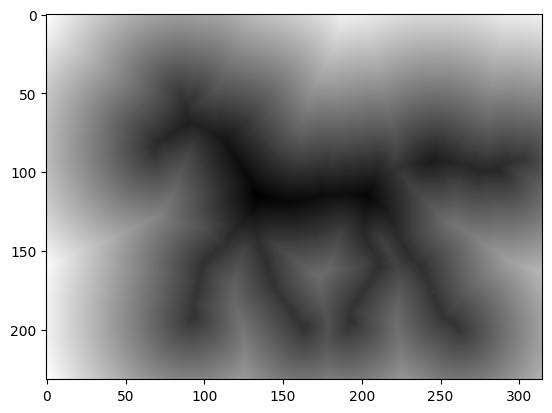

In [12]:
import imageio
from scipy import ndimage
#im = imageio.imread('c:/work/teaching/machine learning/data/horse001b.png')
im = imageio.imread('D:/Datasets/WeizmannHorse/masks/horse001.jpg')
im=(im>128)
dt=ndimage.distance_transform_edt(1-im)
dt1=ndimage.distance_transform_edt(im)
dt[dt1>0]=-dt1[dt1>0]
print(im.shape)
from torch.utils.data import Dataset,TensorDataset, DataLoader
nx,ny=im.shape
X=torch.zeros(nx*ny,2)
Y=torch.zeros(nx*ny)
for i in range(nx):
    for j in range(ny):
        Y[i*ny+j]=dt[i,j]
        X[i*ny+j]=torch.tensor([i,j])
nhidden=64
plt.imshow(Y.reshape(nx,ny),cmap='gray')
np.savetxt('X.csv',X,fmt='%1.1f',delimiter=',')
np.savetxt('Y.csv',Y,fmt='%1.3f',delimiter=',')

In [14]:
# standardize the data
mx=torch.mean(X,axis=0,keepdims=True)
sx=torch.std(X,axis=0,keepdims=True)
X=(X-mx)/sx
Y=Y-torch.mean(Y,0) 
X=torch.cat((torch.ones((X.shape[0],1)),X),axis=1)
print(X.shape,Y.shape)

torch.Size([73080, 3]) torch.Size([73080])


In [ ]:
from torch.utils.data import TensorDataset
x=torch.arange(-10,10.1,0.1)
y=torch.sin(x)
x=x/torch.std(x)
y=y-torch.mean(y)
x=torch.cat((torch.ones(x.shape[0],1),x.view(-1,1)),axis=1)
print(x.shape)
plt.plot(x[:,1].numpy(),y.numpy())
x,y=x.to(device),y.to(device)

In [ ]:
d=x.shape[1]
la=0.001
A=torch.randn((d,32),device=x.device)
F=Fmat(A,x)
b,b0=fitOLS(F*(x@A),y,la)
py=anet(A,b,b0,x)
A=fitA(F,x,y,b,b0,la)
print(A.shape)

In [ ]:
# generate sythetic data

import torch
import torch.nn as nn
import torch.nn.functional as Fn
from torch.utils.data import TensorDataset

# sin x2 dataset
def gen_sinx2(n,d):
    x=torch.randn(n,d)
    xt=torch.randn(n,d)
    y=torch.sin(torch.sum(x**2,1))
    yt=torch.sin(torch.sum(xt**2,1))
    yt=yt-torch.mean(y)
    y=y-torch.mean(y)
    x=torch.cat((torch.ones(x.shape[0],1),x),axis=1)
    xt=torch.cat((torch.ones(xt.shape[0],1),xt),axis=1)
    #print(x.shape,xt.shape,y.shape,yt.shape)
    #plt.plot(x[:,1].numpy(),y.numpy(),'.')
    x,y=x.to(device),y.to(device)
    xt,yt=xt.to(device),yt.to(device)
    return x,y,xt,yt


In [16]:
# train Adam, SGD or BFGS
import torch.optim as optim
from sklearn.metrics import roc_auc_score

class Net(nn.Module):
    def __init__(self,d,h,no):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(d, h,bias=False)  
        self.fc2 = nn.Linear(h, no)
        #self.relu= nn.LeakyReLU()
        self.relu= nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x


allr2=[]
allr2t=[]
allmse=[]
allmset=[]
alltimes=[]
for run in range(100):
    lr=0.03
    batch=2048
    if 1:
        #ti, vi= train_test_split(np.arange(X.shape[0]),test_size=0.2, random_state=run)
        #x,y=X[ti,:],Y[ti,:]
        #xt,yt=X[vi,:],Y[vi,:]
        x,xt,y,yt = train_test_split(X.numpy(),Y.numpy(),test_size=0.2, random_state=run)
        print(x.shape,y.shape,xt.shape,yt.shape)
        x=torch.tensor(x).float().to(device)
        y=torch.tensor(y).float().to(device)
        xt=torch.tensor(xt).float().to(device)
        yt=torch.tensor(yt).float().to(device)
    else:
        x,y,xt,yt=gen_sinx2(1000,1)
        y=y.view(-1)
        yt=y.view(-1)
    n=x.shape[0]
    my=torch.mean(y)
    msy=torch.mean((y-my)**2).item()
    msyt=torch.mean((yt-my)**2).item()
    trainset = TensorDataset(x,y)
    trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch, shuffle=True)    
    t0=time()
    if len(y.shape)==1:
        net = Net(x.shape[1],nhidden,1)
    else:
        net = Net(x.shape[1],nhidden,y.shape[1])
    net=net.to(device)
    with torch.no_grad():
        py=net(x).squeeze()
        err=torch.mean((py.view(-1)-y.view(-1))**2).item()
        pyt=net(xt).squeeze()
        errt=torch.mean((pyt.view(-1)-yt.view(-1))**2).item()
    r2=1-err/msy
    r2t=1-errt/msyt
    errs=[err]
    errst=[errt]
    r2s=[r2]
    r2ts=[r2t]
    times=[0]
    print('run %d, [0] loss: %1.3f %1.3f r2: %1.3f %1.3f'%(run+1,err,errt,r2,r2t))
    optimizer = optim.SGD(net.parameters(), lr=lr)
    #optimizer = optim.Adam(net.parameters(), lr=lr)
    #optimizer = optim.LBFGS(net.parameters(), lr=lr, max_iter=20)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=100, gamma=0.1)
    for epoch in range(300):  # loop over the dataset multiple times
        running_loss = 0.0
        nobs=0
        for data in trainloader:
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            nobs+=inputs.shape[0]
#            def closure():
#                optimizer.zero_grad()
#                outputs = net(inputs).squeeze()
#                loss = torch.mean((outputs-labels)**2)
#                loss.backward()
#                return loss
            if 1:
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                outputs = net(inputs).squeeze()
                loss = torch.mean((outputs-labels)**2)
                #loss= w1*torch.mean((outputs[labels>0]-labels[labels>0])**2)+w0*torch.mean((outputs[labels<=0]-labels[labels<=0])**2)
                #print(inputs.shape,outputs.shape,labels.shape,loss.shape)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()*inputs.shape[0]
            else:
                optimizer.step(closure)
                with torch.no_grad():
                    outputs = net(inputs).squeeze()
                    running_loss += torch.sum((outputs-labels)**2).item()

        t1=time()-t0
        times.append(t1)
        err=running_loss/nobs
        with torch.no_grad():
            #py=net(x).squeeze()
            #err=torch.mean((py-y)**2).item()
            pyt=net(xt).squeeze()
            errt=torch.mean((pyt-yt.squeeze())**2).item()
            auct=0#roc_auc_score((yt>0).float().cpu(),pyt.cpu())
        r2=1-err/msy
        errs.append(err)
        r2s.append(r2)
        errst.append(errt)
        r2t=1-errt/msyt
        r2ts.append(r2t)
        scheduler.step()
        if epoch % 10 == 9:    # print every 10 epochs
            print('run %d, [%d] loss: %1.3f %1.3f r2: %1.3f %1.3f t=%1.1f auc=%1.3f'%(run+1,epoch + 1,err,errt,r2,r2t,t1,auct))
        if epoch%1000==999:
            batch*=2
            trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch, shuffle=True)       

    allmse.append(errs)
    allmset.append(errst)
    allr2.append(r2s)
    allr2t.append(r2ts)
    alltimes.append(times)
    plt.plot(errs)
    plt.plot(errst)
    #ax=plt.axis([0, len(r2s),0 , max(r2s)+0.02])
    savemat('SGD_horse.mat',{'loss':allmse,'losst':allmset,'r2':allr2,'r2t':allr2t,'time':alltimes})

(58464, 3) (58464,) (14616, 3) (14616,)


KeyboardInterrupt: 

In [ ]:
with torch.no_grad():
    py=net(x)
savemat('NN_sin.mat',{'x':x.cpu().numpy(),'y':y.cpu().numpy(),'py':py.cpu().numpy(),'loss':allmse})
plt.plot(x[:,1].cpu().numpy(),y.cpu().numpy())
plt.plot(x[:,1].cpu().numpy(),py.cpu().numpy())

(58464, 3) (58464,) (14616, 3) (14616,)
1 0 49.27678680419922 50.428016662597656 0.9290565800730531 0.9266811410483496
0.40509033203125 0.009002208709716797 0.0009999275207519531
1 [1] mse:25.36 36.87 37.62 r2:0.947 -1943.143 0.945 t:1.5 auc=0.000, ld=1162
0.40909314155578613 0.0009996891021728516 0.0
1 [2] mse:27.86 24.91 25.81 r2:0.964 0.464 0.962 t:1.9 auc=0.000, ld=1187
0.4180934429168701 0.0010001659393310547 0.0009996891021728516
1 [3] mse:19.89 20.72 21.65 r2:0.970 0.965 0.969 t:2.3 auc=0.000, ld=1270
0.44409894943237305 0.0010006427764892578 0.0010004043579101562
1 [4] mse:16.91 16.01 16.62 r2:0.977 0.249 0.976 t:2.8 auc=0.000, ld=1311
0.40209031105041504 0.0010001659393310547 0.0010004043579101562
1 [5] mse:14.40 15.24 15.94 r2:0.978 0.974 0.977 t:3.2 auc=0.000, ld=1337
0.376084566116333 0.0010004043579101562 0.0010001659393310547
1 [6] mse:13.77 14.43 15.00 r2:0.979 0.978 0.978 t:3.6 auc=0.000, ld=1339
0.37708353996276855 0.0010008811950683594 0.0010004043579101562
1 [7] mse:

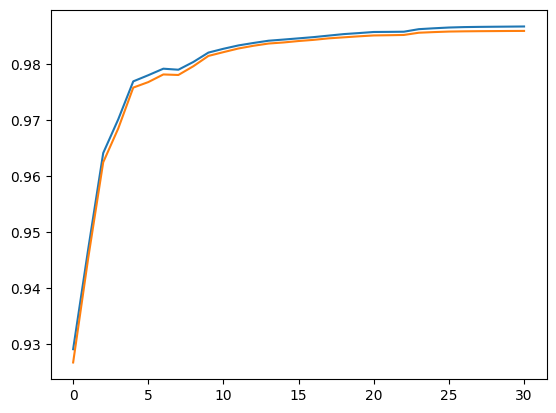

9.189,9.646,0.986
(58464, 3) (58464,) (14616, 3) (14616,)
2 0 44.41366958618164 44.5390510559082 0.9360296819609368 0.9353656795096021
0.45710301399230957 0.0009996891021728516 0.0010006427764892578
2 [1] mse:23.73 29.01 28.65 r2:0.958 0.578 0.958 t:0.5 auc=0.000, ld=1190
0.3870859146118164 0.0010008811950683594 0.0
2 [2] mse:17.97 27.24 27.06 r2:0.961 -10.885 0.961 t:0.9 auc=0.000, ld=1284
0.4056518077850342 0.0009999275207519531 0.0010004043579101562
2 [3] mse:19.62 22.54 22.29 r2:0.968 -10.352 0.968 t:1.3 auc=0.000, ld=1215
0.39108777046203613 0.0010001659393310547 0.0010004043579101562
2 [4] mse:17.98 19.43 19.20 r2:0.972 -64.887 0.972 t:1.7 auc=0.000, ld=1235
0.4320967197418213 0.0010008811950683594 0.0
2 [5] mse:16.67 16.13 15.93 r2:0.977 0.928 0.977 t:2.1 auc=0.000, ld=1264
0.37508344650268555 0.0010004043579101562 0.0010006427764892578
2 [6] mse:14.67 15.10 14.90 r2:0.978 0.927 0.978 t:2.5 auc=0.000, ld=1271
0.38608574867248535 0.0010004043579101562 0.0010006427764892578
2 [7] 

KeyboardInterrupt: 

In [17]:
# train ANMIN
import torch.nn.functional as Fn
from sklearn.metrics import roc_auc_score
from anmin import anet,anet1,fitOLS,Fmat,fitA

np.set_printoptions(precision=3)

nhidden=32
la=0.001
al=0.
allr2=[]
allr2t=[]
allmse=[]
allmset=[]
alltimes=[]
alllogdets=[]
for run in range(100):
    if 1:
        x,xt,y,yt = train_test_split(X.numpy(),Y.numpy(),test_size=0.2, random_state=run)
        print(x.shape,y.shape,xt.shape,yt.shape)
        x=torch.tensor(x).float().to(device)
        y=torch.tensor(y).float().to(device)
        xt=torch.tensor(xt).float().to(device)
        yt=torch.tensor(yt).float().to(device)
        #y=torch.sign(y)
    else:
        x,y,xt,yt=gen_sinx2(10000,30)
        y=y.view(-1,1)
        yt=yt.view(-1,1)
    nt=xt.shape[0]
    n=x.shape[0]
    d=x.shape[1]
    n1=torch.sum((y>0).float())
    w1=n1/n
    w0=1-w1
    w=torch.zeros(y.shape,device=x.device)
    w[y>0]=w1
    w[y<=0]=w0
    my=torch.mean(y)
    msy=torch.mean((y-my)**2).item()
    msyt=torch.mean((yt-my)**2).item()
    t0=time()
    A=torch.randn((d,nhidden),device=x.device)
    F=Fmat(A,x)
    G=F*(1-al)+al
    b,b0=fitOLS(G*(x@A),y,la)
    py=anet(A,b,b0,x,al)
    pyt=anet(A,b,b0,xt,al)
    err=torch.mean((py-y)**2).item()
    errt=torch.mean((pyt-yt)**2).item()
    r2=1-err/msy
    r2t=1-errt/msyt
    n=x.shape[0]
    errs=[err]
    errst=[errt]
    r2s=[r2]
    r2ts=[r2t]
    times=[]
    logdets=[]
    print(run+1,0,err,errt,r2,r2t)
    for i in range(30):
        A,ld=fitA(G,x,y,b,b0,la)
        #if np.isnan(ld) or (ld<-10000):
        #    A=torch.randn((d,64),device=x.device)        
        py1=anet1(A,b,b0,G,x)
        pyt1=anet(A,b,b0,xt,al)
        oldF=F.clone()
        F=Fmat(A,x)
        G=F*(1-al)+al
        b,b0=fitOLS(G*(x@A),y,la)
        py=anet(A,b,b0,x,al)
        pyt=anet(A,b,b0,xt,al)
        err1=torch.mean((py1-y)**2).item()
        err=torch.mean((py-y)**2).item()
        errt1=torch.mean((pyt1-yt)**2).item()
        errt=torch.mean((pyt-yt)**2).item()
        auct=0#roc_auc_score((yt>0).float().cpu(),pyt.cpu())
        errs.append(err1)
        errs.append(err)
        errst.append(errt)
        logdets.append(ld)
        r2=1-err/msy
        r2t1=1-errt1/msyt
        r2t=1-errt/msyt
        t1=time()-t0
        r2s.append(r2)
        r2ts.append(r2t)
        times.append(t1)
        print('%d [%d] mse:%.2f %.2f %.2f r2:%.3f %.3f %.3f t:%.1f auc=%1.3f, ld=%1.0f'
              %(run+1,i+1,err1,err,errt,r2,r2t1,r2t,t1,auct,ld))

    plt.plot(r2s)
    plt.plot(r2ts)
    plt.show()
    print('%1.3f,%1.3f,%1.3f'%(min(errs),min(errst),max(r2ts)))
    allmse.append(errs)
    allmset.append(errst)
    allr2.append(r2s)
    allr2t.append(r2ts)
    alltimes.append(times)
    alllogdets.append(logdets)
    #plt.plot(x[:,1].numpy(),y.numpy())
    #plt.plot(x[:,1].numpy(),py.numpy())
    savemat('anmin_sdf.mat',{'loss':allmse,'losst':allmset,'r2':allr2,'r2t':allr2t,'time':alltimes,'logdet':alllogdets})

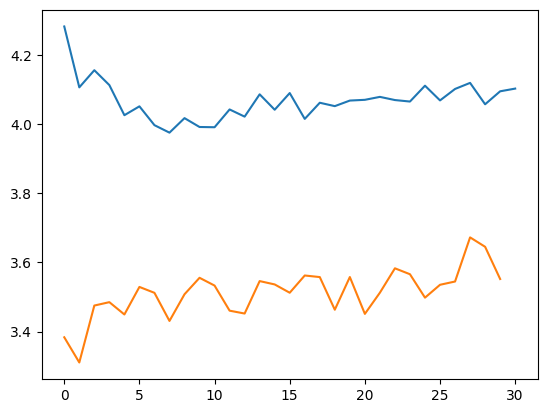

In [16]:
plt.plot(errs[0::2])
plt.plot(errs[1::2])